# Challenge 1: Resume Parser AI Project - Educational Notebook

## 🎯 Theme: AI for Efficiency and Fairness in Recruitment

Welcome to Challenge 1! You'll build an intelligent resume parsing system that helps recruiters efficiently process and evaluate job applications. This challenge explores how AI can make hiring processes more efficient while considering important questions about fairness and bias.

## 📖 What You'll Learn
- **Text Processing**: Clean and prepare unstructured text data
- **Information Extraction**: Identify and extract key information from text
- **Feature Engineering**: Create meaningful metrics from text data
- **Pattern Recognition**: Discover trends across different resume types
- **Ethical AI**: Consider bias and fairness in automated hiring systems

## 🗂️ Dataset Overview
You'll work with a simulated resume dataset containing:
- **Resume Text**: Full resume content with skills, experience, and education
- **Categories**: Job categories (e.g., IT, Marketing, Finance)
- **Experience**: Years of professional experience
- **Education**: Educational background information

## 🚀 Challenge Roadmap
Follow these steps to build your resume parser:

1. **📊 Data Exploration**: Understand your dataset and resume diversity
2. **🧹 Text Preprocessing**: Clean and standardize resume text
3. **🔍 Skill Extraction**: Identify technical and soft skills
4. **📈 Experience Analysis**: Parse and quantify experience levels
5. **🎯 Candidate Scoring**: Develop fair ranking mechanisms
6. **📊 Insights & Visualization**: Discover hiring trends and patterns
7. **💭 Ethical Reflection**: Consider bias and fairness implications

---

## 💡 **Key Insight**: 
Resume parsing isn't just about extracting information - it's about creating fair, unbiased systems that help match the right candidates with the right opportunities while respecting human diversity and avoiding discrimination.

---

### Task 1: Load and Explore the Dataset

**🎯 Goal**: Understand your resume data and the diversity of candidates

**📝 What to do**:
- Load the dataset and examine its structure
- Analyze the distribution of job categories and experience levels
- Look at sample resumes to understand the variety in formats and content

**💡 Key Questions to Consider**:
- What types of roles are represented in the dataset?
- How diverse are the experience levels?
- What challenges might arise from different resume formats?
- How can we ensure our parser works fairly across all types of candidates?

🔄 Loading real resume dataset...
📊 Dataset Overview:
Total resumes: 100
Columns: ['Category', 'Resume', 'Experience_Years', 'Education']
Dataset shape: (100, 4)

📋 First 3 resume samples:
      Category                                             Resume  \
0      Finance  Experienced professional in finance with 3 yea...   
1    Marketing  Experienced professional in marketing with 0 y...   
2  Engineering  Experienced professional in engineering with 3...   

   Experience_Years Education  
0                 3  Bachelor  
1                 0       PhD  
2                 3    Master  

📈 Job Category Distribution:
Category
Engineering        25
Marketing          23
Data Science       18
Finance            17
Web Development    17
Name: count, dtype: int64



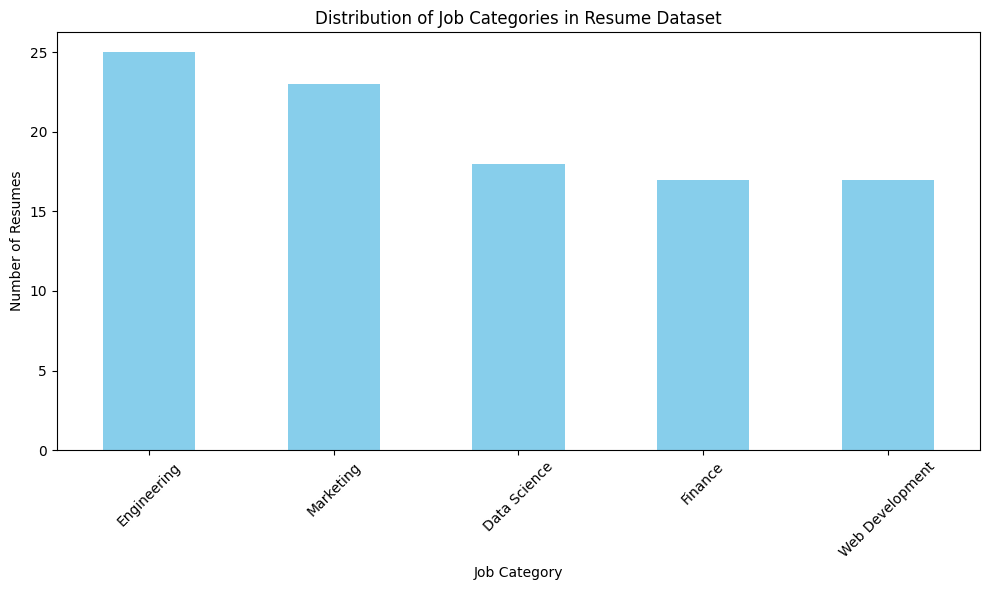

💼 Experience Level Analysis:
Experience range: 0-10 years
Average experience: 4.9 years


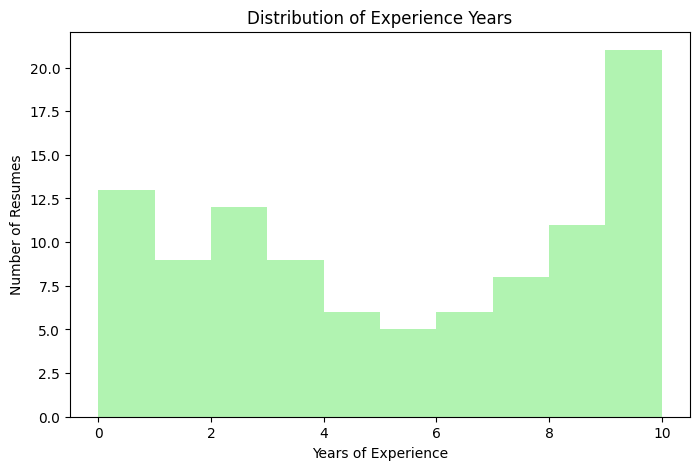

✅ Data exploration complete! Now you understand your real resume data.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the real resume dataset
print("🔄 Loading real resume dataset...")
df = pd.read_csv("../data/resume_dataset.csv")

# Display basic information about the dataset
print("📊 Dataset Overview:")
print(f"Total resumes: {len(df)}")
print(f"Columns: {list(df.columns)}")
print(f"Dataset shape: {df.shape}")
print()

# Show first few rows
print("📋 First 3 resume samples:")
print(df.head(3))
print()

# Analyze category distribution
print("📈 Job Category Distribution:")
category_counts = df['Category'].value_counts()
print(category_counts)
print()

# Visualize category distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Job Categories in Resume Dataset')
plt.xlabel('Job Category')
plt.ylabel('Number of Resumes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze experience distribution if available
if 'Experience_Years' in df.columns:
    print("💼 Experience Level Analysis:")
    print(f"Experience range: {df['Experience_Years'].min()}-{df['Experience_Years'].max()} years")
    print(f"Average experience: {df['Experience_Years'].mean():.1f} years")
    
    plt.figure(figsize=(8, 5))
    plt.hist(df['Experience_Years'], bins=10, color='lightgreen', alpha=0.7)
    plt.title('Distribution of Experience Years')
    plt.xlabel('Years of Experience')
    plt.ylabel('Number of Resumes')
    plt.show()

print("✅ Data exploration complete! Now you understand your real resume data.")

### Task 2: Text Preprocessing
Before we can extract information, we need to clean the resume text. This involves converting text to lowercase, removing punctuation, and removing stopwords.


In [3]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r"[^a-zA-Z\s]+", "", text)
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# YOUR_CODE_HERE: Apply preprocessing to the 'Resume' column
df['Processed_Resume'] = df['Resume'].apply(preprocess_text)

print(df[['Resume', 'Processed_Resume']].head())


                                              Resume  \
0  Experienced professional in finance with 3 yea...   
1  Experienced professional in marketing with 0 y...   
2  Experienced professional in engineering with 3...   
3  Experienced professional in engineering with 8...   
4  Experienced professional in marketing with 1 y...   

                                    Processed_Resume  
0  experienced professional finance years experie...  
1  experienced professional marketing years exper...  
2  experienced professional engineering years exp...  
3  experienced professional engineering years exp...  
4  experienced professional marketing years exper...  


### Task 3: Keyword Extraction (Skills)
Let's try to extract skills from the processed resumes. For simplicity, we'll use a predefined list of common skills and check for their presence.


In [4]:
common_skills = [
    'python', 'java', 'c++', 'javascript', 'html', 'css', 'sql', 'excel', 'tableau', 'power bi',
    'machine learning', 'deep learning', 'nlp', 'data analysis', 'statistics', 'r', 'aws', 'azure', 'gcp',
    'project management', 'communication', 'teamwork', 'leadership', 'marketing', 'sales', 'finance',
    'react', 'angular', 'vue', 'django', 'flask', 'node.js', 'spring', 'docker', 'kubernetes'
    # Add more skills as needed
]

def extract_skills(text, skills_list):
    found_skills = [skill for skill in skills_list if skill in text]
    return ' '.join(found_skills) if found_skills else 'None'

# YOUR_CODE_HERE: Apply preprocessing to the 'Processed_Resume' column
df['Extracted_Skills'] = df['Processed_Resume'].apply(lambda x: extract_skills(x, common_skills))

print(df[['Processed_Resume', 'Extracted_Skills']].head())


                                    Processed_Resume      Extracted_Skills
0  experienced professional finance years experie...       excel r finance
1  experienced professional marketing years exper...           r marketing
2  experienced professional engineering years exp...  r project management
3  experienced professional engineering years exp...                     r
4  experienced professional marketing years exper...           r marketing


### Task 4: Simple Candidate Filtering/Ranking
Let's create a very simple ranking based on extracted skills and experience years. We'll assign a score based on the number of extracted skills and experience.


In [5]:
def calculate_score(row):
    skill_count = len(row['Extracted_Skills'].split(" ")) if row['Extracted_Skills'] != 'None' else 0
    experience_score = row['Experience_Years'] * 2  # Give more weight to experience
    return skill_count + experience_score

# YOUR_CODE_HERE: Calculate the score for each resume
df['Score'] = df.apply(calculate_score, axis=1)

# Sort by score in descending order
df_ranked = df.sort_values(by='Score', ascending=False)

print(df_ranked[['Category', 'Experience_Years', 'Extracted_Skills', 'Score']].head(10))


           Category  Experience_Years  \
60  Web Development                10   
11  Web Development                 9   
99     Data Science                10   
68  Web Development                 8   
81  Web Development                 8   
78  Web Development                10   
76  Web Development                10   
15          Finance                10   
62     Data Science                 9   
32      Engineering                10   

                                    Extracted_Skills  Score  
60     python java javascript html css r react flask     28  
11         python java javascript css r django flask     25  
99                           python sql statistics r     24  
68     java javascript html css r react django flask     24  
81  python java javascript html r react django flask     24  
78                          python java javascript r     24  
76                                 css r react flask     24  
15                                   excel r finance

### Task 5: Discussion and Ethical Considerations
Consider the following questions and discuss them:

1.  What are the limitations of this simple resume parser?
2.  How could bias be introduced in such a system (e.g., if the `common_skills` list is not comprehensive or if the dataset is skewed)?
3.  What steps could be taken to make this system more fair and robust?

This challenge provides a basic introduction to building a resume parser. Real-world systems are much more complex and require advanced NLP techniques and careful consideration of ethical implications.
